In [1]:
import pandas as pd
import numpy as np

In [57]:
data = pd.read_csv("../dataset/15features.csv")
data["imagename"] = data.imagename.str.split("[a-z]",expand=True)
data

,imagename,pen_pressure,letter_spacing,size,dimension,is_lowercase,is_continuous,slantness,tilt,entry_stroke_a,staff_of_a,formation_n,staff_of_d,exit_stroke_d,word_formation,constancy
0,0968,2,2,2,1,2,2,3,2,1,2,2,3,2,2,1
1,0809,2,2,2,2,2,2,3,1,1,2,2,3,1,2,2
2,0237,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2
3,0069,2,2,2,1,2,2,1,1,1,1,1,1,1,1,1
4,0966,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2
5,1316,2,2,1,1,2,2,3,1,1,2,2,2,3,2,2
6,1503,2,1,2,2,2,2,2,1,1,3,2,2,3,2,2
7,0113,2,3,2,2,2,1,2,1,1,1,2,2,2,2,2
8,0221,2,2,2,2,2,1,1,1,1,4,1,2,3,1,2
9,0068,1,1,2,2,2,2,1,1,1,2,2,2,2,2,2


In [58]:
from pgmpy.estimators import HillClimbSearch, K2Score
import networkx as nx
import pylab as plt

In [63]:
def genPositiveData(data):
    skeleton = pd.DataFrame()
    writers = np.unique(data.imagename)
    for writer in writers:
        query = str("imagename == '"+str(writer)+"'")
        test = data.query(str(query))
        data1 = test.sample(frac=1)
        data1 = data1.add_prefix('w1_')
        data2 = test.sample(frac=1)
        data2 = data2.add_prefix('w2_')
        temp = pd.concat([data1.reset_index(drop=True),data2.reset_index(drop=True)],axis=1)
        skeleton = skeleton.append(temp)
    return skeleton

def genNegativeData(data):
    data1 = data.sample(frac=1)
    data1 = data1.add_prefix('w1_')
    data2 = data.sample(frac=1)
    data2 = data2.add_prefix('w2_')
    negSamples = pd.concat([data1.reset_index(drop=True),data2.reset_index(drop=True)],axis=1)
    return negSamples

In [64]:
skeleton = pd.DataFrame()
posData = genPositiveData(data)
negData = genNegativeData(data)
temp = negData.append(posData).reset_index(drop=True)
skeleton = temp.append(skeleton)

In [75]:
bigBadDataset = skeleton

In [76]:
bigBadDataset["sameWriter"]=0

In [77]:
bigBadDataset.sameWriter  = np.where(bigBadDataset["w1_imagename"] == bigBadDataset["w2_imagename"],1,0)

In [78]:
bigBadDataset = bigBadDataset.drop(["w1_imagename","w2_imagename"],axis=1)

In [79]:
for columns in bigBadDataset.columns:
    if(columns != "sameWriter"):
        bigBadDataset[str(columns)] = bigBadDataset[str(columns)] - 1

In [81]:
sameWriterHypothesis = len(bigBadDataset.query('sameWriter == 1' )) / len(bigBadDataset)
print(sameWriterHypothesis)
diffWriterHypothesis = len(bigBadDataset.query('sameWriter == 0' )) / len(bigBadDataset)
print(diffWriterHypothesis)

0.5002947678703021
0.49970523212969786


In [85]:
trainData.head()

,w1_pen_pressure,w1_letter_spacing,w1_size,w1_dimension,w1_is_lowercase,w1_is_continuous,w1_slantness,w1_tilt,w1_entry_stroke_a,w1_staff_of_a,...,w2_slantness,w2_tilt,w2_entry_stroke_a,w2_staff_of_a,w2_formation_n,w2_staff_of_d,w2_exit_stroke_d,w2_word_formation,w2_constancy,sameWriter
0,0,1,2,1,1,1,0,0,0,1,...,0,0,0,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,0,0,1,...,2,1,0,1,1,1,1,0,0,1
2,1,2,0,0,1,1,1,0,0,1,...,1,0,0,0,1,1,1,0,1,0
3,1,2,1,1,1,0,0,0,0,0,...,0,0,0,1,1,2,1,1,1,1
4,0,1,1,1,1,1,0,0,0,1,...,2,0,0,3,0,1,2,1,0,1


In [83]:
bigBadDataset = bigBadDataset.sample(frac=1)
bigBadDataset.head().reset_index(drop=True)
trainData = bigBadDataset[0:int(np.floor(len(bigBadDataset)*0.8))]
testData = bigBadDataset[int(np.floor(len(bigBadDataset)*0.8)):]
trainData = trainData.reset_index(drop=True)
testData = testData.reset_index(drop=True)

In [84]:
sameWriterHypothesis = len(testData.query('sameWriter == 1' )) / len(testData)
print(sameWriterHypothesis)
diffWriterHypothesis = len(testData.query('sameWriter == 0' )) / len(testData)
print(diffWriterHypothesis)

0.4979734708916728
0.5020265291083272


In [86]:
est = HillClimbSearch(trainData, scoring_method=K2Score(trainData))
ssj2Model = est.estimate(max_indegree=2)

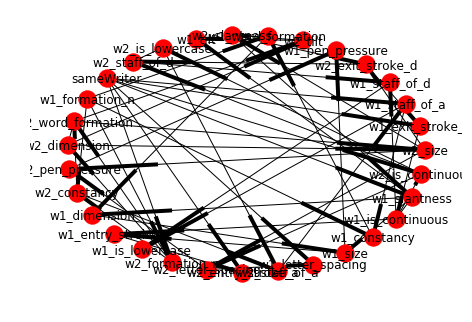

In [88]:
nx.draw(ssj2Model, with_labels=True)
plt.show()

In [121]:
ssj2Model.fit(trainData,complete_samples_only=True)

In [147]:
trainPred = ssj2Model.predict(trainData.iloc[:,0:30])

In [148]:
trainAccuracy = 0
for row in range(len(trainPred)):
    if trainPred.sameWriter[row] == trainData.sameWriter[row]:
        trainAccuracy +=1

In [150]:
trainAccuracy/len(trainData)

0.7439204126750184

In [126]:
sameWriterPrediction = ssj2Model.predict(testData.iloc[:,0:30])

In [131]:
accuracy = 0
for row in range(len(sameWriterPrediction)):
    if sameWriterPrediction.sameWriter[row] == testData.sameWriter[row]:
        accuracy +=1

1

In [143]:
accuracy/len(testData)

0.7406042741341193

In [145]:
from pgmpy.readwrite import BIFWriter

In [146]:
model_data = BIFWriter(ssj2Model)
model_data.write_bif(filename='ssj2Model.bif')